**Data Fields**

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - '1: Clear, Few clouds, Partly cloudy, Partly cloudy 
          - '2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 
          - '3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 
          - '4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
os.listdir()

['.ipynb_checkpoints', 'test_groups.csv', 'train_groups.csv', 'Untitled.ipynb']

In [3]:
train= pd.read_csv('train_groups.csv', sep=',')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1/1/2011 2:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1/1/2011 3:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1/1/2011 4:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test= pd.read_csv('test_groups.csv', sep=',')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1/20/2011 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,1/20/2011 1:00,1,0,1,1,10.66,13.635,56,0.0000
2,1/20/2011 2:00,1,0,1,1,10.66,13.635,56,0.0000
3,1/20/2011 3:00,1,0,1,1,10.66,12.880,56,11.0014
4,1/20/2011 4:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.shape

(10886, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


** Some observations**

- There is No NAN value in the dataset
- Categorical data:- Season,Holiday,WorkingDay,Weather,
- numercial data:- Humidity,Casual,Registered,Count
- Continuous numerical data:- temp,atemp
- Datetime is an object type and is a good candidate for feature engineering

In [24]:
# Need to change the formats for both train and test so combine them
combine = [train, test]

combine[0][:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1/1/2011 0:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1/1/2011 1:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [25]:
combine[1][:2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,1/20/2011 0:00,1,0,1,1,10.66,11.365,56,26.0027
1,1/20/2011 1:00,1,0,1,1,10.66,13.635,56,0.0000


In [26]:
# Iterate thought list and convert to the require formats
# We can create day, month, hour and year from the datetime
for x in combine:
    x['datetime'] = pd.to_datetime(x['datetime'])
    x['year']= x['datetime'].apply(lambda y: y.year)
    x['month']= x['datetime'].apply(lambda y: y.month)
    x['day']= x['datetime'].apply(lambda y:y.day)
    x['hour']= x['datetime'].apply(lambda y: y.hour)

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [29]:
test.sample(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
2792,2011-11-24 21:00:00,4,1,0,1,14.76,17.425,71,11.0014,2011,11,24,21
3394,2012-01-27 03:00:00,1,0,1,2,17.22,21.210,94,19.0012,2012,1,27,3
4427,2012-05-25 07:00:00,2,0,1,2,25.42,28.030,88,11.0014,2012,5,25,7
3362,2012-01-25 19:00:00,1,0,1,2,13.94,18.180,53,0.0000,2012,1,25,19
2357,2011-09-29 18:00:00,4,0,1,1,26.24,31.060,41,15.0013,2011,9,29,18


In [32]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour'],
      dtype='object')

In [33]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [46]:
# Most of the categorical variables have already been encoded
# Now that we have day, month, year, hour extracted from the datetime, datetime colummn can be removed

train.drop(['datetime'], axis=1, inplace=True)
test.drop(['datetime'], axis=1, inplace=True)

In [47]:
for list in combine:
    print(list.columns)

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour'],
      dtype='object')
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')


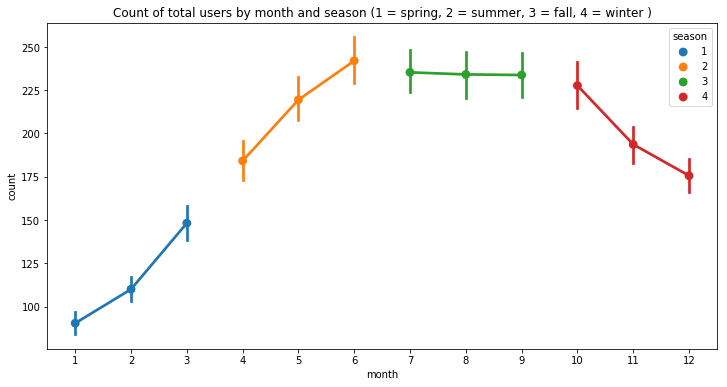

In [58]:
# Some plots

fig, ax = plt.subplots(figsize=(12,6))

# season - 1 = spring, 2 = summer, 3 = fall, 4 = winter 
sns.pointplot(data = train[['count', 'month', 'season']],
            x = 'month',
            y = 'count',
            hue = 'season',
            ax=ax)

ax.set(title='Count of total users by month and season (1 = spring, 2 = summer, 3 = fall, 4 = winter )')
plt.show();

[Text(0.5,1,'Number of total users by count')]

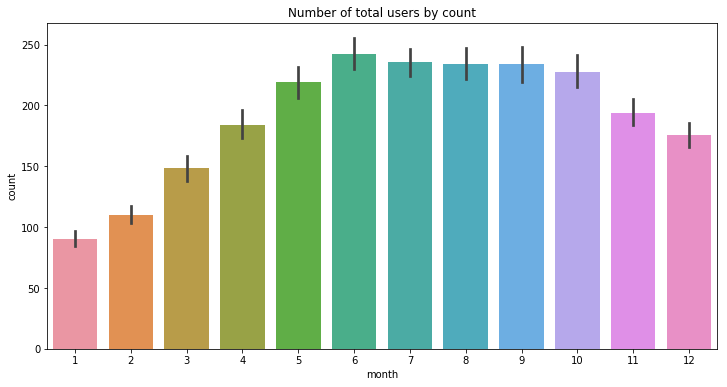

In [69]:
fig, ax = plt.subplots(figsize=(12,6))

sns.barplot(data = train[['count', 'month']],
            x = 'month',
            y = 'count',
            ax=ax)

ax.set(title='Number of total users by count')

In [72]:
import calendar
import datetime
mydate = datetime.datetime.now()
mydate.strftime("%b")
mydate.strftime("%B")

'September'

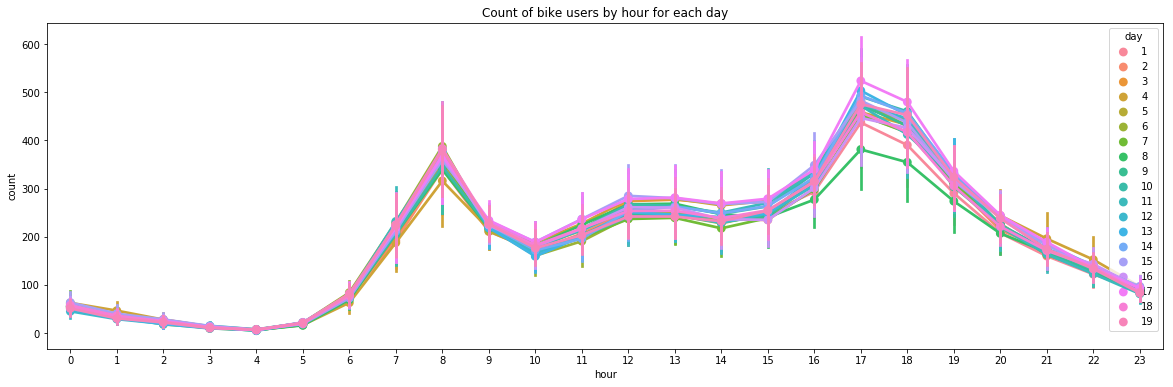

In [104]:
# Count by hour by day

fig, ax = plt.subplots()
fig.set_size_inches(20,6)

sns.pointplot(data = train[['hour', 'day', 'count']],
             x = 'hour',
             y = 'count',
             hue= 'day',
             ax = ax)

ax.set(title='Count of bike users by hour for each day')
plt.show();

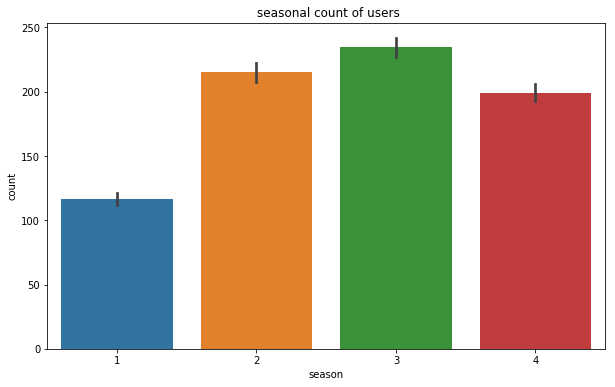

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [110]:
# Count by season

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(data= train[['season', 'count']],
           x = 'season',
           y ='count',
           ax = ax)
ax.set(title=' seasonal count of users')
plt.show();

train['season'].value_counts()

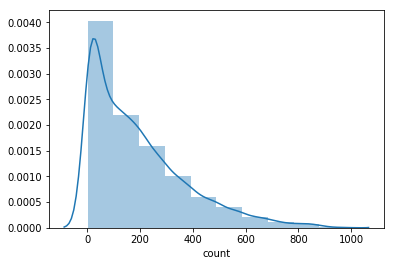

In [115]:
# distribution of the count of users

sns.distplot(train['count'], bins=10)

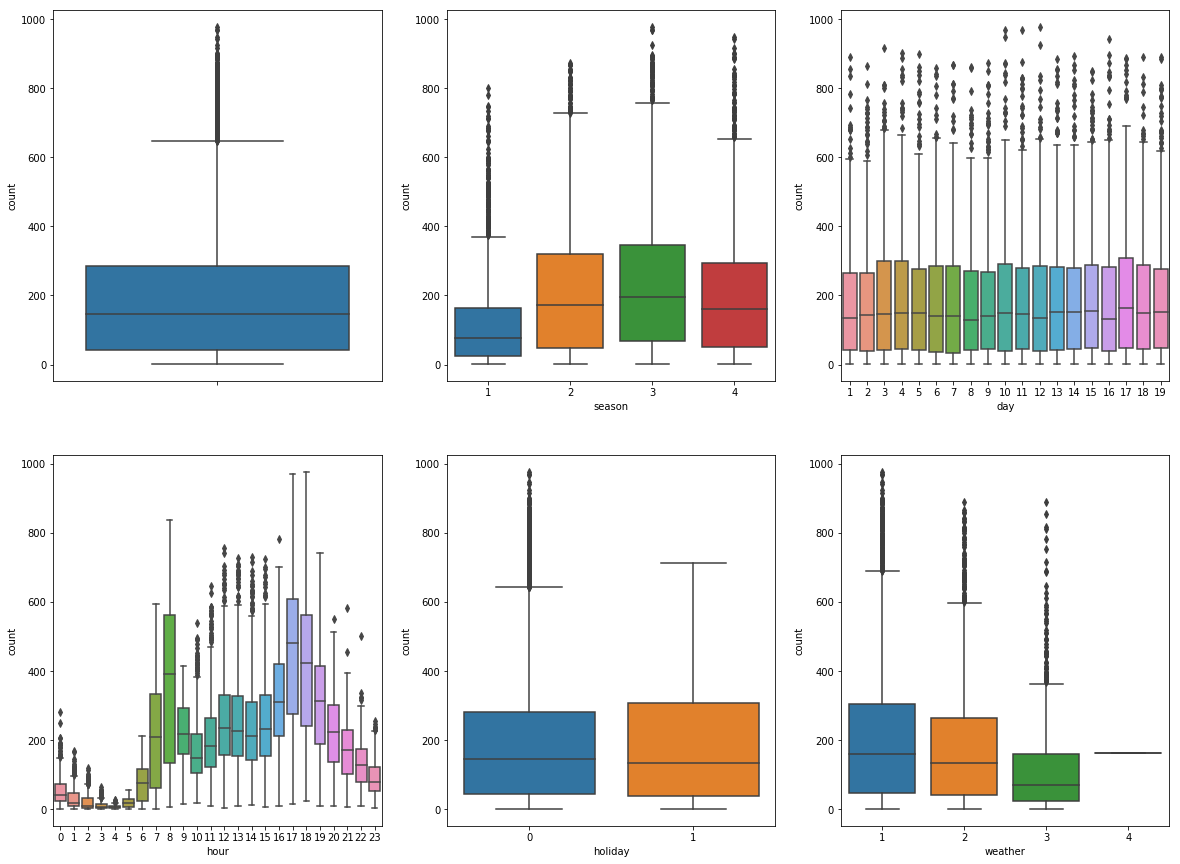

In [124]:
# Distribution of users is highly skewed to the left
# This could be due to outliers

# Use a boxplot to check for outliers

fig, ax = plt.subplots(2,3, figsize=(20,10)) # 3 rows and 3 columns
fig.set_size_inches(20,15)
# for total_count
sns.boxplot(y='count', data= train, ax= ax[0][0])
# count by season
sns.boxplot(data= train, x='season', y='count', ax=ax[0][1])
# count by day
sns.boxplot(data=train, x= 'day', y='count', ax=ax[0][2])
# count by hour
sns.boxplot(data=train, x='hour', y='count', ax= ax[1][0])
# count by holiday
sns.boxplot(data=train, x='holiday', y='count', ax= ax[1][1])
# count by weather
sns.boxplot(data= train, x='weather', y='count', ax=ax[1][2])



In [131]:
# Mean count by month sorted in ascending order
train[['month', 'count']].groupby(['month'], as_index=False).mean().sort_values(by='count', ascending=True)

,month,count
0,1,90.366516
1,2,110.003330
2,3,148.169811
11,12,175.614035
3,4,184.160616
10,11,193.677278
4,5,219.459430
9,10,227.699232
8,9,233.805281
7,8,234.118421


In [132]:
# Model

train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'hour'],
      dtype='object')

In [133]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'year', 'month', 'day', 'hour'],
      dtype='object')

In [154]:
# we will remove the 'count' as it is the total count of casual and registered

## We use 'count' as the response variable and drop 'casual' and 'registered' since this is what will be predicted

y = train['count']

cols = [ col for col in train.columns if col not in ['count','casual', 'registered']]
X = train[cols]

In [158]:
# We will split the data we have in train into train and validation/test set and do the prediction 
# for the test data provided
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [159]:
# Training set shape
print('X_train shape', X_train.shape)
print('y_train shape', y_train.shape)

X_train shape (8708, 12)
y_train shape (8708,)


In [160]:
# Validation set
print('X_val shape', X_val.shape)
print('y_val shape', y_val.shape)

X_val shape (2178, 12)
y_val shape (2178,)


In [144]:
# test set shape
test.shape
X_test = test
print('X_test shape', X_test.shape)

X_test shape (6493, 12)


### Random Forest Regression

In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# For regression, the default values for scoring would be the
# Regression
#------------
# ‘explained_variance’	metrics.explained_variance_score	 
# ‘neg_mean_absolute_error’	metrics.mean_absolute_error	 
# ‘neg_mean_squared_error’	metrics.mean_squared_error	 
# ‘neg_mean_squared_log_error’	metrics.mean_squared_log_error	 
# ‘neg_median_absolute_error’	metrics.median_absolute_error	 
# ‘r2’	metrics.r2_score

grid_values={'n_estimators':[100, 150, 200, 250, 300],
            'max_features': ['auto', 'sqrt', 'log2']}

regressor = RandomForestRegressor()

# Optimize for accuracy
grid_search_clf = GridSearchCV(regressor, param_grid = grid_values, scoring = 'r2')
grid_search_clf.fit(X_train, y_train)

best_parameters = grid_search_clf.best_params_
best_accuracy = grid_search_clf.best_score_

In [162]:
best_parameters

{'max_features': 'auto', 'n_estimators': 250}

In [163]:
best_accuracy

0.937104323872746

In [164]:
# Build the model using the best parameters we have identified from Grid search

# Random Forest model

regressor = RandomForestRegressor(n_estimators = 100, max_features='auto')
regressor.fit(X_train, y_train)

# Predict the values for validation

y_pred = regressor.predict(X_val)

In [165]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_pred, y_val)

26.968273645546372

In [166]:
# Using k-fold stratified cross-validation
# default for k is 10 and we will use that

from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(regressor, X_train, y_train, cv=10)

# this will return 10 different values for accuracy and we will use the mean
accuracy.mean()

0.94100408102509514

In [181]:
print("Accuracy score or R2 score using Random Forest regressor is {:2.1f}%".format(accuracy.mean()*100))

Accuracy score or R2 score using Random Forest regressor is 94.1%


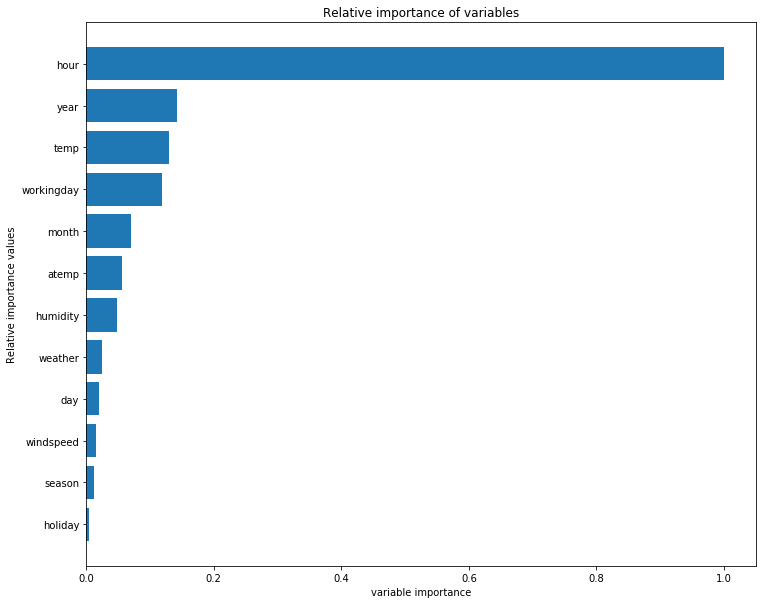

season 0.0125700270482
holiday 0.00395434071452
workingday 0.118447993745
weather 0.0248530999346
temp 0.130236603295
atemp 0.0564637969292
humidity 0.0490527587955
windspeed 0.0152931412316
year 0.141914400893
month 0.0708108369533
day 0.0195364793605
hour 1.0


In [218]:
# Using Random Forest, we can also find the relative importance of features

feature_importance = regressor.feature_importances_
#Normalize
feature_importance = (feature_importance / feature_importance.max())
# return indices sorted by importances
index_sorted = np.argsort(feature_importance) # returns the indexes sorted by importance of features
pos = np.arange(index_sorted.shape[0])

plt.figure(figsize=(12,10))
plt.barh(pos, feature_importance[index_sorted], align='center')
plt.yticks(pos, X_train.columns[index_sorted])
plt.title('Relative importance of variables')
plt.xlabel('variable importance')
plt.ylabel('Relative importance values')
plt.show();

# raw data

for index in range(len(index_sorted)):
    print(X_train.columns[index], feature_importance[index])

In [220]:
# Finally the predictions
y_test = regressor.predict(X_test)

In [222]:
test['prediction']= y_test
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,prediction
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,11.89
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,7.25
2,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,4.45
3,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,3.48
4,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,2.54


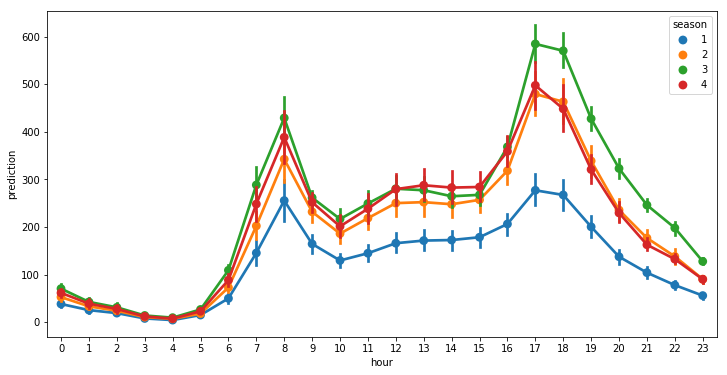

In [225]:
# lets do a plot by hour on the test set for seasons

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.pointplot(data = test,
             x = 'hour',
             y = 'prediction',
             hue = 'season',
             ax = ax)
plt.show();


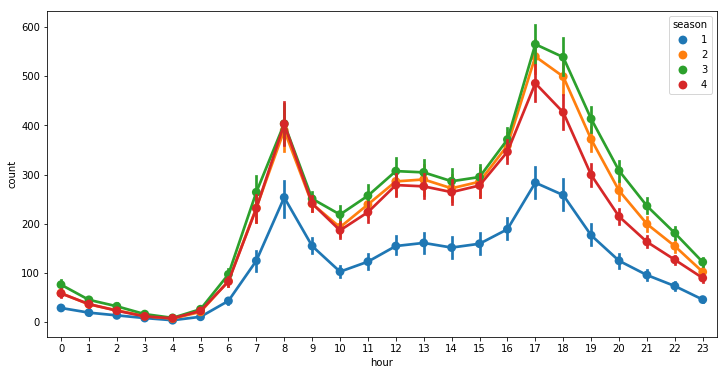

In [227]:
# comparing this with the traingin set
fig, ax = plt.subplots()
fig.set_size_inches(12,6)
sns.pointplot(data = train,
             x = 'hour',
             y = 'count',
             hue = 'season',
             ax = ax)
plt.show();
